In [3]:
%matplotlib inline
from pylab import *

import detectorgeometry as geom
reload(geom)

import detectorgeometry_trap as geom_trap
reload(geom_trap)

import detectorgeometry_071719 as geom_new
reload(geom_new)

<module 'detectorgeometry_071719' from 'detectorgeometry_071719.pyc'>

In [27]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 500000 # number of samples

theta_src = radians(0.8)
area = geom_trap.Area(theta_src,h,R,theta_view, N)
A, e_phi, e_theta, view_angle, exit_angle, norm, e_dot= area.event_retention()
# earth_t_min, earth_t_max, phi_E_min, phi_E_max = area.earth_patch(area.t_src,area.phi_src, area.th_v)
# r_x, r_y, r_z = area.coords(area.t_src, area.phi_src + np.pi) 
# t_e,phi_e = area.earth_locs(earth_t_min, earth_t_max, phi_E_min, phi_E_max)
# e_x,e_y,e_z = area.coords(t_e,phi_e)
# dot = area.dot_prod(e_x,e_y,e_z,r_x, r_y,r_z)
# view_angle,exit_angle, flight_path = area.view_angle_dist_det(e_x,e_y,e_z,r_x, r_y,r_z)


0 6.28318530718


6.283159536315549
0.00017549501796909617


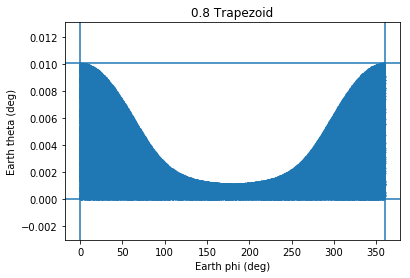

In [28]:
#print A, e_phi, view_angle
plt.scatter(degrees(e_phi), degrees(e_theta),s=1)
plt.xlabel("Earth phi (deg)")
plt.ylabel("Earth theta (deg)")
plt.axhline(degrees(min(e_theta)))
plt.axhline(degrees(max(e_theta)))
plt.axvline(degrees(min(e_phi)))
plt.axvline(degrees(max(e_phi)))

print radians(max(degrees(e_phi))-min(degrees(e_phi)))
print radians(max(degrees(np.unwrap(e_theta)))-min(degrees(np.unwrap(e_theta))))
            

# plt.scatter(e_phi, e_theta,s=1)
# plt.xlabel("Earth phi (rad)")
# plt.ylabel("Earth theta (rad)")
# plt.axhline(min(e_theta))
# plt.axhline(max(e_theta))
# plt.axvline(min(e_phi))
# plt.axvline(max(e_phi))

plt.title(str(round(degrees(theta_src),1))+" Trapezoid")
#plt.ylim(0.8*min(degrees(samp_t_e) ),1.2*max(degrees(samp_t_e) ))

plt.show()



In [14]:
h = 35.5 #km
R = 6356. # km
theta_view = radians(1) #degrees
N = 10000000 # number of samples
start = 0 # minimum source declination in degrees
end = 90 # maximum source declination in degrees
steps= 90 # divisions indeclination used to generate plot

areas1=[]
areas2=[]
for j in range(0,steps):
    theta = radians(start+(end-start)*float(j)/steps)
    
    area1 = geom.Area(theta,h,R,theta_view, N)
    A1 = area1.degree_eff_area()
    
    area2 = geom_trap.Area(theta,h,R,theta_view, N)
    A2, phi_e, theta_e, view_angle, exit_angle, norm, e_dot= area2.event_retention()
#     earth_t_min, earth_t_max, phi_E_min, phi_E_max = area2.earth_patch(area2.t_src,area2.phi_src, area2.th_v)
#     earth_t =area2.thetaE_nadir(theta)
#     print np.arcsin((R+h) * np.sin(theta) / R)
#     print 2*np.pi* (h * np.tan(theta)) 
#     print (2*np.pi*np.sin(earth_t)*R)
#     print earth_t , earth_t_min, earth_t_max, phi_E_min, phi_E_max
    
    areas1.append(A1)
    areas2.append(A2)
    print degrees(theta),A1, A2
    print "   "


0 6.28318530718
0.0 1.5508360546819964 1.8098118259059996
   
0 6.28318530718
1.0 0.986743368802631 1.921575208052308
   
-0.026179938779914945 0.026179938779914945
2.0 1.2680849779718546 1.4067417210491269
   
-0.026179938779914945 0.026179938779914945
3.0000000000000004 0.7039485990184564 1.3293597968981758
   
-0.026179938779914945 0.026179938779914945
4.0 1.8282895089940654 1.2976639118214415
   
-0.026179938779914945 0.026179938779914945
5.0 0.8426548611059418 1.2826605192544782
   
-0.026179938779914945 0.026179938779914945


KeyboardInterrupt: 

In [ ]:
# Creating a plot for the full range of possible source declinations 
fig = plt.figure(figsize=(7,7))
ax = plt.axes()
x = np.linspace(start-90,end-90,steps)

ax.plot(x, areas1)
ax.plot(x, areas2)
    
horizon = degrees(np.arcsin(R / (R+h)))-90
#plt.xlim(-10,0)  
legend = ax.legend(["Full Cap", "Trapezoid"], fontsize=14)
plt.xlabel("Payload Elevation Angle of Source "+r'$\theta_{ele}$'+" (degrees)", fontsize=18)
plt.ylabel(r'$\langle A \rangle_g$'+" "+r'$[km^2]$', fontsize=18)
plt.title("Geometric Effective Area", fontsize=20)
plt.setp(legend.get_title(),fontsize='x-large')
ax.tick_params(axis = 'both', which = 'major', labelsize = 16)
plt.grid(True,which='both')
plt.semilogy()